<a href="https://colab.research.google.com/github/abhijeet90/ANN/blob/main/Day_4_ANN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [10]:
print(tf.__version__)

2.14.0


In [11]:
## import some basic librareis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [13]:
dataset
# Here Exited is dependent feature and all others are independent features
# Now, first thing is we need to convert this dataset into dependent and independent features

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
## Divide the dataset into independent and dependent features

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [15]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [16]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
## Feature engineering
geography = pd.get_dummies(X['Geography'], drop_first=True)
# drop_true --> instead of showing three columns it will show two columns which is Germany and Spain
# Because if France is present, Germany and Spain will become zero
# So, we can use two columns to represent three columns
gender = pd.get_dummies(X['Gender'], drop_first= True)

In [18]:
X = X.drop(['Geography','Gender'], axis = 1)

In [19]:
## Concatenate theses varible to dataset
X = pd.concat([X,geography,gender], axis = 1)

In [20]:
# Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [21]:
## Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [23]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [24]:
X_train.shape

(8000, 11)

In [25]:
## Part 2. Create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU # Activation functios
from tensorflow.keras.layers import Dropout

In [28]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [60]:
## Lets initialize the ANN
classifier = Sequential()

In [61]:
## Adding the input layer
# When you look at the shape of the datafram you will see there are 11 featues. which means 11 nodes
classifier.add(Dense(units=11, activation = 'relu'))
classifier.add(Dropout(0.3)) # Use dropout in every hidden layer
# Used Dense because Dense will help us in creating input, hidden and output layer. Right now we are adding Input layer.
# We have 11 feautures that's why we use units = 11
# in activation we used ReLu. ReLu will get applied to the next layer.
# So, here we have created input layer, we provide how many nodes we want and we also provide in next layer which activation
# function should use

In [62]:
## Adding first hidden layer
classifier.add(Dense(units=7, activation='relu'))
# In this we have created 7 neuron in the hidden layer and for the next layer we used activation function ReLu.

In [63]:
## Adding second hidden layer
classifier.add(Dense(units=6, activation='relu'))

In [64]:
## ADDing output layer
classifier.add(Dense(1,activation='sigmoid'))
# Here, we have added output layer which is 1 and as this is a binary classification problem we use sigmoid as our activation fucntion

In [65]:
classifier.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])
# By-default adam use 0.01 as a learning rate

## If you want to specify custom learning rate
import tensorflow

opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

You can use the variable 'opt' in optimizer parameter in compile()

In [66]:
#model_history = classifier.fit(X_train,y_train, validation_split=0.33, batch_size=10, epochs=1000)

In [67]:
## how to consider epoch size

In [68]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [69]:
## early stopping
import tensorflow as tf
import keras
early_stopping =keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [70]:
model_history = classifier.fit(X_train,y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks = early_stopping)
# We are telling that you have to stop and you have to monitor this validation loss to make sure that if it doesn't improve
# we are going to stop is over there.

Epoch 1/1000
536/536 [==============================] - 5s 8ms/step - loss: 0.5965 - accuracy: 0.6910 - val_loss: 0.4639 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4615 - accuracy: 0.7981 - val_loss: 0.4424 - val_accuracy: 0.7967
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4451 - accuracy: 0.8059 - val_loss: 0.4310 - val_accuracy: 0.8031
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4283 - accuracy: 0.8091 - val_loss: 0.4179 - val_accuracy: 0.8050
Epoch 5/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4142 - accuracy: 0.8196 - val_loss: 0.4061 - val_accuracy: 0.8084
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4051 - accuracy: 0.8278 - val_loss: 0.3942 - val_accuracy: 0.8254
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3888 - accuracy: 0.8382 - val_loss: 0.3857 - val_accuracy:

In [71]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

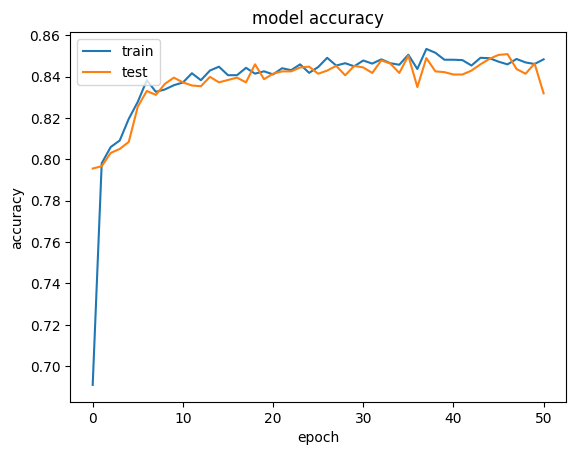

In [72]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

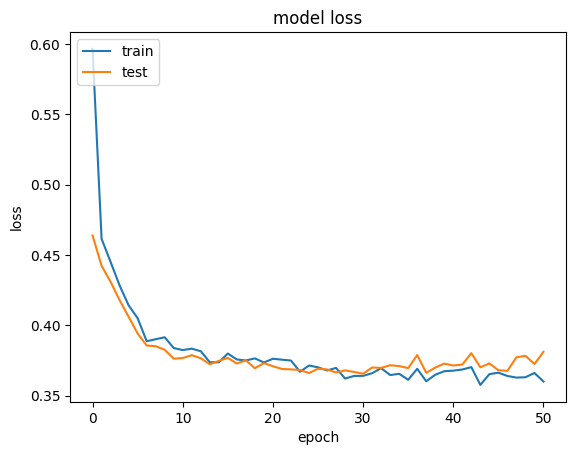

In [73]:
# Summarize history for the loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [74]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [75]:
## Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1582,   13],
       [ 320,   85]])

In [76]:
## calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [77]:
score

0.8335

In [78]:
## Get the weights
classifier.get_weights()
# it will always be in the array format


[array([[ 1.10864406e-02, -5.90385795e-02, -7.26065338e-02,
         -3.28879505e-02,  1.55304030e-01,  4.89331633e-02,
          5.55049023e-03,  2.32422397e-01, -2.16996390e-03,
          5.76239266e-02,  1.48576805e-02],
        [ 2.03211755e-01, -7.63915777e-01,  1.86834380e-01,
          5.18374503e-01, -8.22136939e-01, -1.15984023e+00,
          2.24820629e-01, -7.35014021e-01, -1.09511006e+00,
          2.56189704e-01,  5.80657363e-01],
        [-1.36309378e-02, -2.11258903e-01, -1.03188656e-01,
          2.71329167e-03, -6.27425984e-02,  8.87706876e-02,
          1.43959438e-02,  2.32532576e-01, -7.65179470e-02,
          1.92577288e-01, -1.08601540e-01],
        [ 2.28718489e-01,  2.94223994e-01, -3.08199137e-01,
         -1.97837397e-01, -1.93235502e-01, -2.46686637e-01,
         -5.63580334e-01, -3.89175117e-01, -3.24506730e-01,
         -2.56117165e-01, -2.29444087e-01],
        [ 9.15318608e-01, -4.72700782e-03, -5.49810112e-01,
         -5.85385799e-01, -2.44026314e-02,  